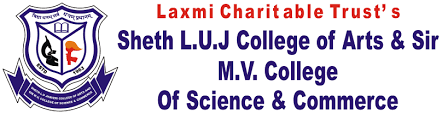

**RAM KUMAR SINGH T118**

**PRACTICAL NO.5**

AIM:ANOVA (Analysis of Variance)

1)Perform one-way ANOVA to compare means across multiple groups.

2)Conduct post-hoc tests to identify significant differences between group means.

ONE-WAY ANOVA

Compare mean systolic BP (ap_hi) across 3 cholesterol levels:

cholesterol = 1 → Normal

cholesterol = 2 → Above normal

cholesterol = 3 → Well above normal

In [3]:
# ONE-WAY ANOVA: ap_hi across cholesterol groups

group1 = df[df['cholesterol'] == 1]['ap_hi'].dropna()
group2 = df[df['cholesterol'] == 2]['ap_hi'].dropna()
group3 = df[df['cholesterol'] == 3]['ap_hi'].dropna()

print("Group sizes:", len(group1), len(group2), len(group3))

F_stat, p_value = stats.f_oneway(group1, group2, group3)

print("F-statistic:", F_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 → Mean BP differs across cholesterol groups.")
else:
    print("Conclusion: Fail to reject H0 → No difference in mean BP among groups.")


Group sizes: 52385 9549 8066
F-statistic: 21.574299112560183
p-value: 4.298210022124933e-10
Conclusion: Reject H0 → Mean BP differs across cholesterol groups.


<Figure size 640x480 with 0 Axes>

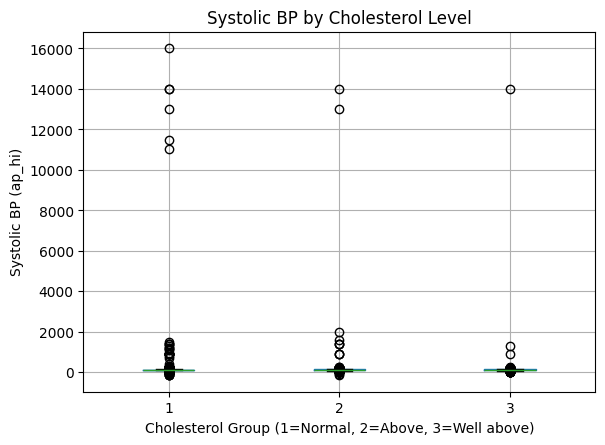

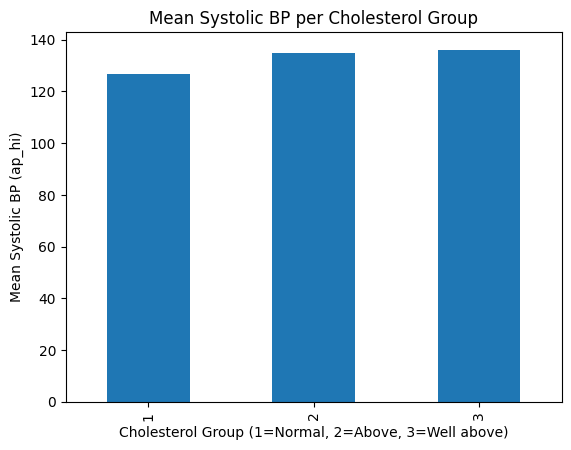

In [5]:
# Boxplot for cholesterol groups
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='ap_hi', by='cholesterol')
plt.title("Systolic BP by Cholesterol Level")
plt.suptitle("")
plt.xlabel("Cholesterol Group (1=Normal, 2=Above, 3=Well above)")
plt.ylabel("Systolic BP (ap_hi)")
plt.show()

# Bar plot of mean ap_hi per cholesterol group
plt.figure()
df.groupby('cholesterol')['ap_hi'].mean().plot(kind='bar')
plt.title("Mean Systolic BP per Cholesterol Group")
plt.xlabel("Cholesterol Group (1=Normal, 2=Above, 3=Well above)")
plt.ylabel("Mean Systolic BP (ap_hi)")
plt.show()


TWO-WAY ANOVA

Study effect of Gender & Smoking Status and their interaction on BP:

Factor A → gender (1 = female, 2 = male)

Factor B → smoke (0 = No, 1 = Yes)

Dependent variable → ap_hi

In [6]:
# TWO-WAY ANOVA: effect of Gender and Smoking on ap_hi

df_anova = df[['ap_hi', 'gender', 'smoke']].dropna()

model = ols('ap_hi ~ C(gender) * C(smoke)', data=df_anova).fit()

print(f"Overall model F({model.df_model:.0f},{model.df_resid:.0f}) = {model.fvalue:.3f}, p = {model.f_pvalue:.4f}")

anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)

alpha = 0.05
print("\nConclusions:")

# Effect of gender
if anova_table.loc["C(gender)", "PR(>F)"] < alpha:
    print("Gender has a significant effect on systolic BP.")
else:
    print("Gender does NOT have a significant effect on systolic BP.")

# Effect of smoking
if anova_table.loc["C(smoke)", "PR(>F)"] < alpha:
    print("Smoking has a significant effect on systolic BP.")
else:
    print("Smoking does NOT have a significant effect on systolic BP.")

# Interaction effect
if anova_table.loc["C(gender):C(smoke)", "PR(>F)"] < alpha:
    print("There is a significant interaction between gender and smoking.")
else:
    print("No significant interaction between gender and smoking.")


Overall model F(3,69996) = 1.071, p = 0.3598

ANOVA Table:
                          sum_sq       df         F    PR(>F)
C(gender)           7.481020e+04      1.0  3.153961  0.075747
C(smoke)            1.634356e+04      1.0  0.689036  0.406495
C(gender):C(smoke)  1.675618e+01      1.0  0.000706  0.978796
Residual            1.660266e+09  69996.0       NaN       NaN

Conclusions:
Gender does NOT have a significant effect on systolic BP.
Smoking does NOT have a significant effect on systolic BP.
No significant interaction between gender and smoking.



Mean ap_hi by Gender and Smoking:
smoke            0           1
gender                        
1       128.169220  126.490775
2       130.480852  128.644324


<Figure size 640x480 with 0 Axes>

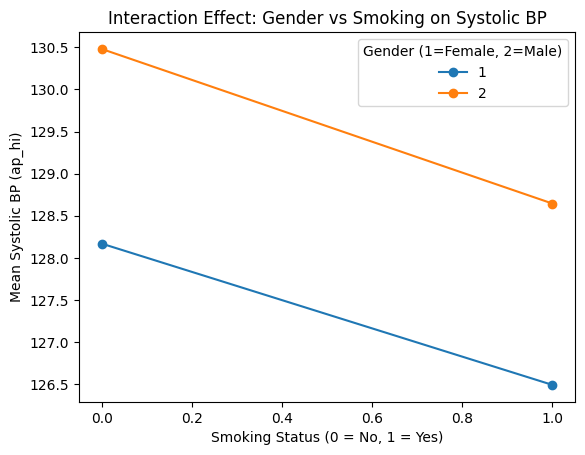

In [7]:
# Interaction plot: Gender x Smoke on ap_hi
interaction_data = df.groupby(['gender', 'smoke'])['ap_hi'].mean().unstack()

print("\nMean ap_hi by Gender and Smoking:")
print(interaction_data)

plt.figure()
interaction_data.T.plot(marker='o')
plt.title("Interaction Effect: Gender vs Smoking on Systolic BP")
plt.xlabel("Smoking Status (0 = No, 1 = Yes)")
plt.ylabel("Mean Systolic BP (ap_hi)")
plt.legend(title="Gender (1=Female, 2=Male)")
plt.show()


In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=df['ap_hi'],     # dependent variable
                          groups=df['cholesterol'],  # independent variable
                          alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   8.1795    0.0  4.1642 12.1949   True
     1      3   9.4835    0.0  5.1673 13.7998   True
     2      3    1.304 0.8413 -4.1532  6.7612  False
----------------------------------------------------


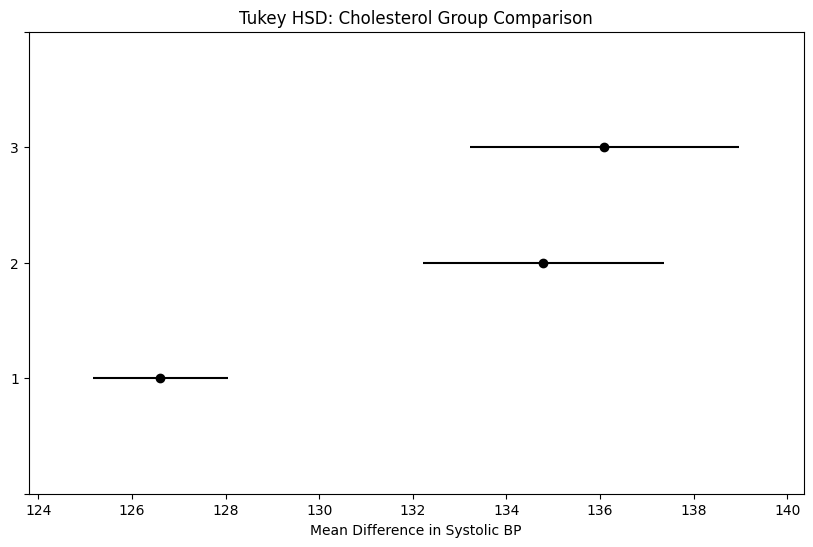

In [9]:
tukey.plot_simultaneous()
plt.title("Tukey HSD: Cholesterol Group Comparison")
plt.xlabel("Mean Difference in Systolic BP")
plt.show()
